# Dataset definition

## Training set

The training set is a subset of the preprocessed data, which is used to train the model by learning the underlying relationship in the data. The quality and quantity of the training set determines how good a model will perform on unseen data and how well it generalizes. In supervised learning, the training dataset contains a set of features and a target vector. The objective of the training dataset is to provide the diverse data points that can help map the algorithm to the target given the features. 

### Use of the training set:
- During training, the model uses the training dataset to learn the parameters from data by optimizing a scoring function.
- The training set is used in multiple iterations, where the model adjusts its parameters to maximize the scoring function.

### Key functions of the training set:
- The training set provides the data necessary for the model to learn and adjust the parameters. It does by using an iterative process to minimize the errors during prediction.
- It ensures that the model is exposed to various patterns in the underlying data, so the model will be able to generalize to unseen data.

### Benefits of training set:
- A good training set enables the model to learn from a wide range of data to capture the underlying pattern.
- A high-quality training set is required to make more accurate predictions.

### Common issues with training set:
- A small training set can lead to underfitting, which is when the model does not learn enough from the data.
- If the training set is not representative of the real world data, the model leads to poor generalization.
- If the model learns too much from the data, it tends to capture the noise in the data and as a result, the model performs well only on training set and not on real world data. There are several techniques to mitigate this, such as regularization, dropouts, pruning, etc which varies by the particular algorithm.

### Factors to consider
- The training set should be representative of the problem the model learns. This way the model can generalize on unseen data.
- The sample size must be large enough, so that the model is exposed to large number of examples to learn from. Typically, 70-90% of the data samples are used as the training dataset.
- In case of classification task, imbalance in classes can lead to model bias. A balanced count of classes helps the model to learn parameters better.

## Validation set 

The validation set is especially useful for cross-validation and hyperparameter tuning during the training phase. Hyperparameters are a set of parameters that are controlled outside of the model training. During training, the model learns by adjusting its internal parameters based on training data. However, to avoid overfitting, the performance of the model is evaluated on a separate set of data, which is the validation set. Thus by tuning the hyperparameters, using training data to learn the model parameters and evaluating against the validation data, which is unseen by the model during learning, the most optimal hyperparameter with generalization capability can be identified.

### Time-series cross validation

There are various types of cross validation technique such as K-Fold, Stratified K-Fold, Leave-one-Out, but they tend to shuffle the dataset. Due to the temporal patterns in the time-series the order of the series should be maintained. Hence, for time series, there are two main cross-validation techniques, which are anchored walk forward and non-anchored walk forward.

#### Anchored walk-forward validation

Considering the number of splits as 5 named as $s_1, s_2, s_3, s_4, s_5$, in the anchored walk forward, initially, $s_1$ is used to train the model, followed by evaluation with $s_2$. The evaluation results are stored and then $s_1$ and $s_2$ will be the training set and $s_3$ serves as the validation set. This process continues untill all the segments but not the last have been used for training <cite data-cite='validation'></cite>. `sklearn` package provides a convinient module `TimeSeriesSplit`, <cite data-cite='scikit-learn'></cite> using which, the anchored walk-forward considering a timeseries with range 0 to 24 is demonstrated below.

In [1]:
# imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, train_test_split
from sklearn.metrics import accuracy_score, classification_report, make_scorer
from sklearn.dummy import DummyClassifier
from utils import HiddenMarkovModel, BayesianBeliefNetwork
import tqdm

sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

In [2]:
ts = np.arange(25)
tscv = TimeSeriesSplit(n_splits=5)
for i, j in enumerate(list(tscv.split(ts))):
    print(f'Iteration {i+1}: ')
    print(f'\tTraining set: {j[0]}\tvalidataion set: {j[1]}')

Iteration 1: 
	Training set: [0 1 2 3 4]	validataion set: [5 6 7 8]
Iteration 2: 
	Training set: [0 1 2 3 4 5 6 7 8]	validataion set: [ 9 10 11 12]
Iteration 3: 
	Training set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]	validataion set: [13 14 15 16]
Iteration 4: 
	Training set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]	validataion set: [17 18 19 20]
Iteration 5: 
	Training set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]	validataion set: [21 22 23 24]


#### Non-anchored walk-forward validation

In the non-anchored walk-forward, a sliding window is used, that rolls through the splits. Consider $m$ splits out of which $n \mid n<m$ is used for training. Initially, the first $n$ splits are used for training, and the model is evaluated on the subsequent split. Then, the sliding window moves forward by one split, expanding the training set to include the next split, and the model is evaluated on the subsequent split. This process continues until the sliding window reaches the last split <cite data-cite='validation'></cite>. The non-anchored walk-forward considering a timeseries of range 0 to 24 is shown below.

In [3]:
ts = np.arange(25)
n_splits = 5
split_length = len(ts)//n_splits
reshaped = ts.reshape(n_splits, -1)
n_train = 2

for i in range(3):
    train = reshaped[i:i+n_train].ravel()
    val = reshaped[i+n_train]
    print(f'Iteration {i+1}: ')
    print(f'\tTraining set: {train}\tvalidataion set: {val}')

Iteration 1: 
	Training set: [0 1 2 3 4 5 6 7 8 9]	validataion set: [10 11 12 13 14]
Iteration 2: 
	Training set: [ 5  6  7  8  9 10 11 12 13 14]	validataion set: [15 16 17 18 19]
Iteration 3: 
	Training set: [10 11 12 13 14 15 16 17 18 19]	validataion set: [20 21 22 23 24]


## Testing set

The performance of the trained model is assessed using a test set, which is a portion of the preprocessed dataset. We do not use a test set to develop the model, it's purely used for evaluation purposes. It represents the unseen data in real world, which helps researched estimate how well the model generalizes. In macro strategy, researchers use this dataset to evaluate the fully-trained model to estimate the error rate.

### Tool for a fair assessment:
- Centralising ability test data set as used to ensure generalizing ability of machine learning model. The reliability and robustness of the machine learning model rely on the test data set as it's used to evaluate the model.
- The purpose of the test data set is to prevent the model from overfitting and avoid bias. The objective of the test data set is to assess the model's ability on how well it predict new unseen data. 
- During training, the process model uses the training dataset to learn the parameters and find the optimal objective function so that we get the desired output. In this training, the potential pitfall that we can see is the model can overfit the training data. 
- When overfitting occurs when the model captures all the variability in the data. The model becomes adept at predicting outputs for the specific examples it has been trained on but fails to perform well on unseen data.
- The safeguard mechanism here to protect from overfitting is by testing the data with a test dataset which is a portion of collected data initially split, which helps to set the benchmark in evaluating the model's ability.

### Key Functions of the Test Set:
- The true performance of the trained model is assessed not during the validation phase or training phases, the Test set does it. It performs an unbiased evaluation to understand how the model will perform in real-world applications.
- Test dataset measures the model’s ability to generalise well from training data to new unseen data, to ensure the model doesn't overfit with training data, and does it have good generalising capability.
- The test set serves as the ultimate benchmark for the model’s performance, used only after the model has been fully trained and validated. It provides a clear metric for comparing different models or approaches.

### Benefits of the Testing Set:
- Unbiased evaluation is done using a test data set when the model is trained it is assessed against unseen data this test data set provides an uncontaminated assessment of the model performance this showcases trained model's true capability and how it avoids overfitting of the data.
- Test data sets evaluate how the trained model determines patterns for unseen scenarios if a model has high accuracy on training data and performs poor on test data that indicates it last generalizability.
- If we have many models and we want to choose one out of them test set acts as an instrument there to select the optimal model out of it by comparing the performance of each model and which generalizes well for unseen data
- The test data set is used to estimate errors associated with the model. Estimation of errors is very important in understanding the model's limitations and areas of improvement.

### Common mistakes in test data sets
- If there is an overlap between a training data set and test data set it compromises the objectivity of the evaluation. So the test data set should be completely separated from the train set while doing the train test split of the collected data to ensure the test set is truly unseen from the model during training.
- In train test split we usually do 80 20 splits between train and test data set so usually test set becomes too small and it becomes unreliable in estimating the model performance. 
- It is good to allocate 10 to 30% of the collected data for testing as it is considered optimal size based on the characteristics of the data and  data science problem we are trying to solve.
- The test set is not representative of the whole distribution. The test set should be a random unbiased sample of the entire data set if not it might skew the evaluation result.

## Validation Set vs. Test Set

- The validation set is used to tweak hyperparameters and make decisions regarding the model's structure. It aids in determining the best model among several possibilities. The test set is kept for the model's final evaluation once all tweaking and training are completed.
- During training, the model's performance is regularly assessed on the validation set. This aids in the fine-tuning of the model and prevents overfitting. The test set is only used once, and it provides a precise evaluation of the model's performance on previously unknown data.
- The objective is to improve the model's performance and make decisions regarding model modifications without utilizing the test set, hence keeping its unbiased character. The purpose is to evaluate the model's generalization capabilities and guarantee that it performs well on fresh data before making an ultimate decision of its efficacy.

# Data allocation on training, validation and test set

## Data summary

The following shows the summary of the dataset.

In [4]:
df = pd.read_csv('data/data.csv', index_col=0)
df.index = pd.to_datetime(df.index)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 2002-01-01 to 2024-01-01
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STEO.PAPR_OPEC.M     265 non-null    float64
 1   STEO.PATC_OECD.M     265 non-null    float64
 2   STEO.CORIPUS.M       265 non-null    float64
 3   STEO.PASC_OECD_T3.M  265 non-null    float64
 4   STEO.COPS_OPEC.M     265 non-null    float64
 5   STEO.COPC_OPEC.M     265 non-null    float64
 6   XOM                  265 non-null    float64
 7   CVX                  265 non-null    float64
 8   BP                   265 non-null    float64
 9   CNQ                  265 non-null    float64
 10  COP                  265 non-null    float64
 11  WTI                  265 non-null    float64
dtypes: float64(12)
memory usage: 26.9 KB


## Training and test set split

The dataset consist of monthly observations of 12 features that ranges from `Jan-01-2002` to `Jan-01-2024`. Out of this, 10% of the data are split as the testing set and left untouched during the training phase. This is done using `sklearn train_test_split` function <cite data-cite='scikit-learn'></cite>. The parameter `shuffle` is set to `False` to maintain the temporal relationship. Remaining 90% of the data are used for training and validation.

In [5]:
train, test = train_test_split(df, test_size=0.1, shuffle=False)

print(f'Shape of the training data: {train.shape}')
print(f'Date range of training data: {train.index[0].date()} : {train.index[-1].date()}')
print(f'Shape of the testing data: {test.shape}')
print(f'Date range of testing data: {test.index[0].date()} : {test.index[-1].date()}')

Shape of the training data: (238, 12)
Date range of training data: 2002-01-01 : 2021-10-01
Shape of the testing data: (27, 12)
Date range of testing data: 2021-11-01 : 2024-01-01


## Discretizing train and test set

Once we have split the testing data, we transform the continuous dataset into discrete using Hidden Markov Models. It is important to use only the training data to learn the parameters $A$ (Transition matrix), $B$ (Emission probability) and $\pi$ (Prior probabilities) of the HMM <cite data-cite='li_2023'></cite>. Through `sklearn`, one can use TransformerMixin to fit the training data, learn the parameters and transform the training data using `fit_transform` method and use the learnt parameter and transform the testing data using `transform` method. So, a class `HiddenMarkovModel` was created, that inherits the `TransformerMixin` <cite data-site='scikit-learn'></cite>. 

After transforming both training and test data, a column is created, which is a shifted version of `WTI` by a lead of 1. This column is the target, as the model is going to predict the regime of WTI at time `t+1` given the features at time `t`.

The following shows the first 5 entries of WTI and target of the discretized training set and test set, where 0 represents bear regime, 1 represents stagnant regime and 2 represents bull regime.

In [6]:
hmm_model = HiddenMarkovModel(n_states=3, n_iter=100, random_state=100, algorithm='map')

discrete_train = hmm_model.fit_transform(train)
discrete_train['target'] = discrete_train['WTI'].shift(-1)
discrete_train.dropna(inplace=True)
discrete_train['target'] = discrete_train['target'].astype(int)

discrete_test = hmm_model.transform(test)
discrete_test['target'] = discrete_test['WTI'].shift(-1)
discrete_test.dropna(inplace=True)
discrete_test['target'] = discrete_test['target'].astype(int)

print(f'Discretized train: \n{discrete_train.iloc[:, -2:].head()}\n')
print(f'Discretized test: \n{discrete_test.iloc[:, -2:].head()}')

Discretized train: 
            WTI  target
2002-02-01    1       1
2002-03-01    1       2
2002-04-01    2       2
2002-05-01    2       0
2002-06-01    0       1

Discretized test: 
            WTI  target
2021-12-01    1       1
2022-01-01    1       2
2022-02-01    2       2
2022-03-01    2       0
2022-04-01    0       1


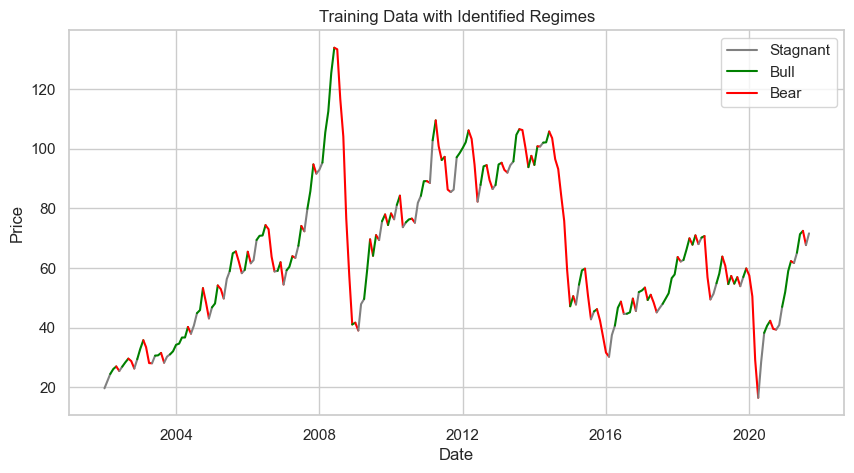

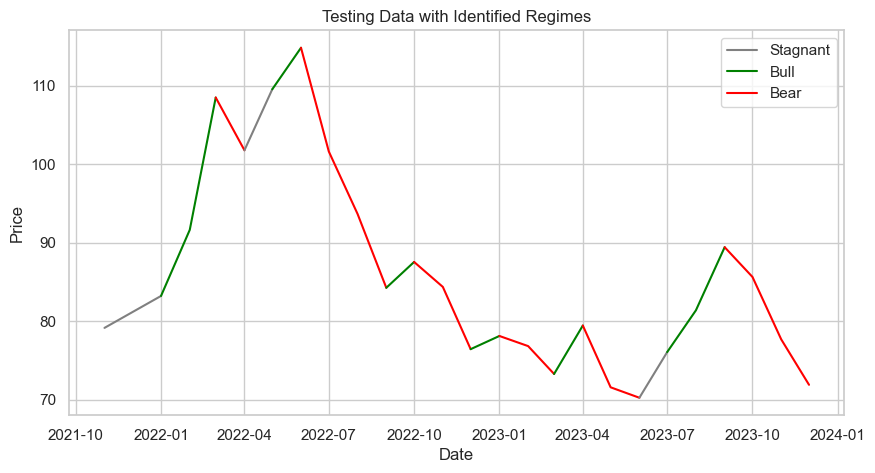

In [7]:
def plot_regimes(plot_data, states, title):
    plt.figure(figsize=(10, 5))
    regime_labels = ['Bear', 'Stagnant', 'Bull']
    regime_colors = ['red', 'grey', 'green']
    current_regime = None
    for i, regime in enumerate(states):
        if current_regime is None:
            current_regime = regime
            x = [plot_data.index[0]]
            y = [plot_data.iloc[0]]
        elif current_regime != regime:
            plt.plot(x, y, color=regime_colors[current_regime], label=regime_labels[current_regime])
            current_regime = regime
            x = [plot_data.index[i], plot_data.index[i+1]]
            y = [plot_data.iloc[i], plot_data.iloc[i+1]]
        else:
            x.append(plot_data.index[i+1])
            y.append(plot_data.iloc[i+1])
    if current_regime is not None:
        plt.plot(x, y, color=regime_colors[current_regime])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.show()

plot_regimes(train['WTI'], discrete_train['WTI'], 'Training Data with Identified Regimes')
plot_regimes(test['WTI'], discrete_test['WTI'], 'Testing Data with Identified Regimes')

The above plot shows the time-series with the identified regimes for both training and test set.

## Baseline model

Once the data is split and discretized, we set a baseline score, which our model should beat to conclude the model is capable of learning something. Since our task is classification, we use a classifier, that predicts the majority class for all the observations and measure it's performance. The metric used to measure the performance is accuracy score.

In [8]:
cls = DummyClassifier()
cls.fit(discrete_train, discrete_train.iloc[:,-1])
baseline_score_train = accuracy_score(cls.predict(discrete_train), discrete_train.iloc[:,-1])
baseline_score_test = accuracy_score(cls.predict(discrete_test), discrete_test.iloc[:,-1])

print(f'Accuracy of baseline model on train set: {np.round(baseline_score_train, 2)}')
print(f'Accuracy of baseline model on test set: {np.round(baseline_score_test, 2)}')

Accuracy of baseline model on train set: 0.4
Accuracy of baseline model on test set: 0.32


## Gridsearch parameters

The purpose of gridsearch is to use the grid of hyperparameters provided and use each of the grid to train a new model and evaluate its performance. The best model out of all the trained model will be chosen as the final model. For that, we need to specify the grids.

In [9]:
params = {
    'expert':[
        None,
        [
            ('target', 'WTI'),
            ('STEO.PAPR_OPEC.M', 'WTI'),
            ('STEO.PATC_OECD.M', 'WTI'),
            ('STEO.PASC_OECD_T3.M', 'WTI'),
            ('WTI', 'XOM'),
            ('WTI', 'CVX')
        ]

    ],
    'scoring_method':['k2score', 'bicscore', 'bdeuscore'],
    'param_estimator':['bayesian', 'mle']
}

for k, v in params.items():
    print(f'{k}:')
    for i, j in enumerate(v):
        print(f'{i}: {j}')

expert:
0: None
1: [('target', 'WTI'), ('STEO.PAPR_OPEC.M', 'WTI'), ('STEO.PATC_OECD.M', 'WTI'), ('STEO.PASC_OECD_T3.M', 'WTI'), ('WTI', 'XOM'), ('WTI', 'CVX')]
scoring_method:
0: k2score
1: bicscore
2: bdeuscore
param_estimator:
0: bayesian
1: mle


The expert is the prior DAG, which is the starting point for the structure learning. The scoring methods are used to evaluate the structure learning performance and the parameter estimator is the method used to estimate the parameters in the parameter learning phase.

## Anchored walk forward validation

Before we train the model, we must use a technique to evaluate the performance of each grid in the hyperparameter space also making sure it does not overfit. To do so, we need to seperate a part of training set into the validation set. In this study, we use the anchored walk-forward approach with 3 splits.

In [10]:
tscv = TimeSeriesSplit(n_splits=3, test_size=int(len(discrete_train) * 0.1))

for i, j in enumerate(tscv.split(train)):
    print(f'Iteration {i+1}:')
    print(f'Train data indices: {j[0][0]} : {j[0][-1]}', end='\t')
    print(f'Test data indices: {j[1][0]} : {j[1][-1]}')

Iteration 1:
Train data indices: 0 : 168	Test data indices: 169 : 191
Iteration 2:
Train data indices: 0 : 191	Test data indices: 192 : 214
Iteration 3:
Train data indices: 0 : 214	Test data indices: 215 : 237


# Bayesian Belief Network

We have done the setup by spliting the dataset, initiating the hyper-parameter space and creating an instance of walk-forward validation. Now, we use the custom class `BayesianBeliefNetwork` with `GridSearchCV` to learn the structure and the parameters of the DAG. <cite pgmpy='li_2023'></cite>

In [11]:
model = GridSearchCV(
    estimator=BayesianBeliefNetwork(), 
    param_grid=params, 
    cv=tscv, 
    scoring='accuracy',
    verbose=1
)

model.fit(discrete_train, discrete_train.iloc[:, -1])

Fitting 3 folds for each of 12 candidates, totalling 36 fits


  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=23),
             estimator=BayesianBeliefNetwork(),
             param_grid={'expert': [None,
                                    [('target', 'WTI'),
                                     ('STEO.PAPR_OPEC.M', 'WTI'),
                                     ('STEO.PATC_OECD.M', 'WTI'),
                                     ('STEO.PASC_OECD_T3.M', 'WTI'),
                                     ('WTI', 'XOM'), ('WTI', 'CVX')]],
                         'param_estimator': ['bayesian', 'mle'],
                         'scoring_method': ['k2score', 'bicscore',
                                            'bdeuscore']},
             scoring='accuracy', verbose=1)

In [12]:
print('Best estimator params:')
for k, v in model.best_estimator_.get_params().items():
    print(f'{k}: {v}')

Best estimator params:
expert: [('target', 'WTI'), ('STEO.PAPR_OPEC.M', 'WTI'), ('STEO.PATC_OECD.M', 'WTI'), ('STEO.PASC_OECD_T3.M', 'WTI'), ('WTI', 'XOM'), ('WTI', 'CVX')]
param_estimator: bayesian
scoring_method: bdeuscore


# Accuracy report

In [13]:
predictions_train = model.predict(discrete_train).ravel()

true_labels = discrete_train.iloc[:, -1]

print("Classification Report on training data:")
print(classification_report(true_labels, predictions_train))

  0%|          | 0/230 [00:00<?, ?it/s]

Classification Report on training data:
              precision    recall  f1-score   support

           0       0.54      0.38      0.44        88
           1       0.44      0.46      0.45        54
           2       0.61      0.77      0.68        94

    accuracy                           0.55       236
   macro avg       0.53      0.53      0.52       236
weighted avg       0.55      0.55      0.54       236



In [14]:
predictions_test = model.predict(discrete_test).ravel()

true_labels = discrete_test.iloc[:, -1]

print("Classification Report on testing data:")
print(classification_report(true_labels, predictions_test))

  0%|          | 0/25 [00:00<?, ?it/s]

Classification Report on testing data:
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.14      0.25      0.18         4
           2       0.56      0.62      0.59         8

    accuracy                           0.52        25
   macro avg       0.49      0.47      0.47        25
weighted avg       0.61      0.52      0.55        25



From the above classification report, the accuracy of the model on training data $55\%$ and that of testing data $52\%$ both beats the baseline.

## Metrics from classification report

- Precision: It measures the accuracy of positive predictions <cite data-site='metrics'></cite>. For each class, it is calculated as the ratio of true positive to the sum of true and false positives. 
  
- Recall: It measures the ability of the model to find the class within the data <cite data-site='metrics'></cite>. It is calculated as the ratio of true positive to the sum of true positives and false negatives. 
  
- f1-score: f1 score is the harmonic mean of precision and recall <cite data-site='metrics'></cite>. 
  
- Support: It is the number of actual count of the specific class within the data <cite data-site='metrics'></cite>. 

From the report, it is evident that the model performs well in bull and bear regime and does a poor job during the stagnant regime. This is due to the low number of samples in the stagnant regime (class imbalance).

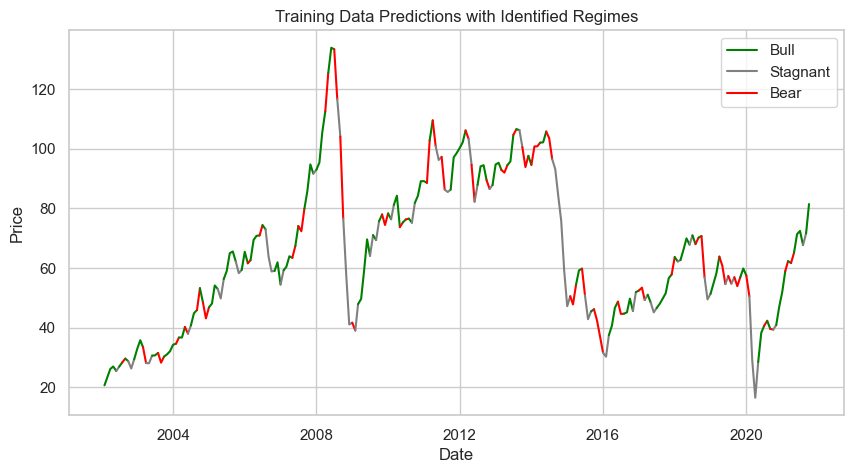

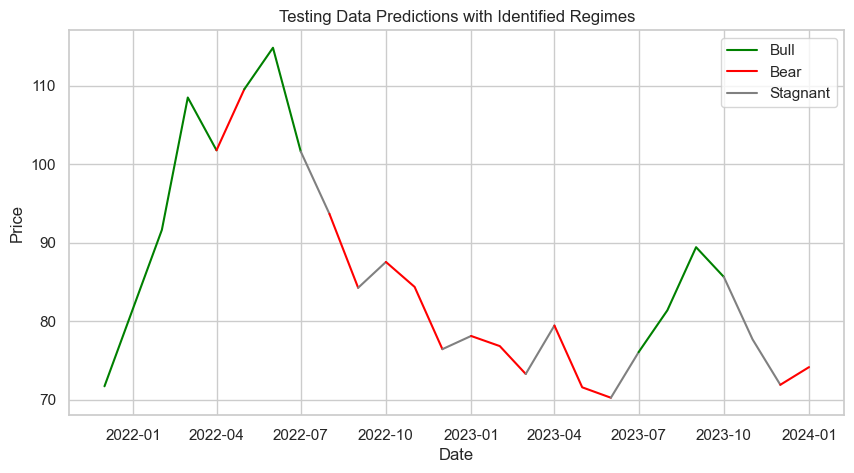

In [15]:
plot_regimes(train['WTI'][1:], predictions_train, 'Training Data Predictions with Identified Regimes')
plot_regimes(test['WTI'][1:], predictions_test, 'Testing Data Predictions with Identified Regimes')

The above plots shows how the model predicts the regimes on the training set and the test set.

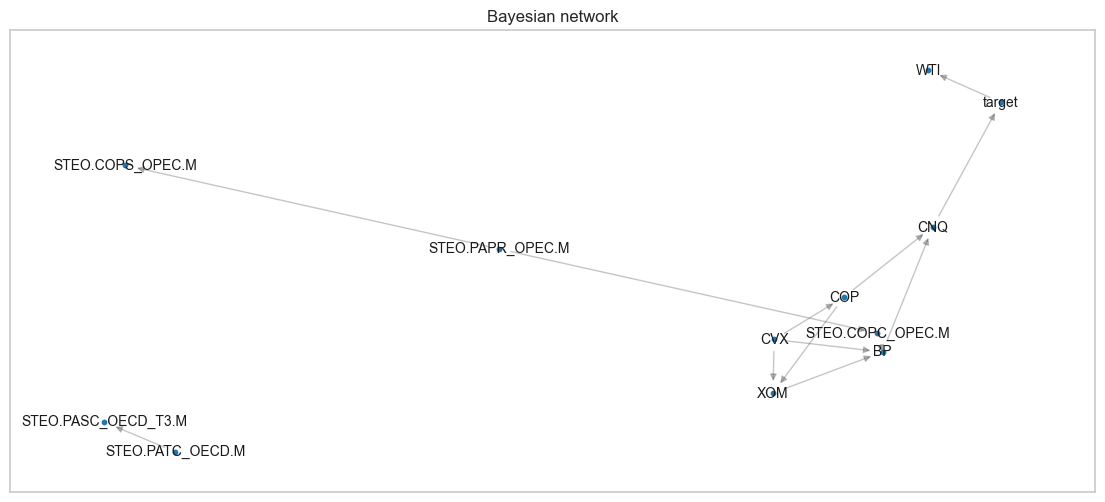

In [16]:
model.best_estimator_.plot_graph()

The plot shows the learnt Bayesian network, which shows the intricate relationship between the variables. From the plot, we can see the target, which is a shift of WTI by 1 lead is directed to WTI.

# Comparision with buy and hold strategy

Buy and hold returns: 3.40%
BBN Model returns: 96.99%
Hypothetical 100% accurate model returns: 329.43%


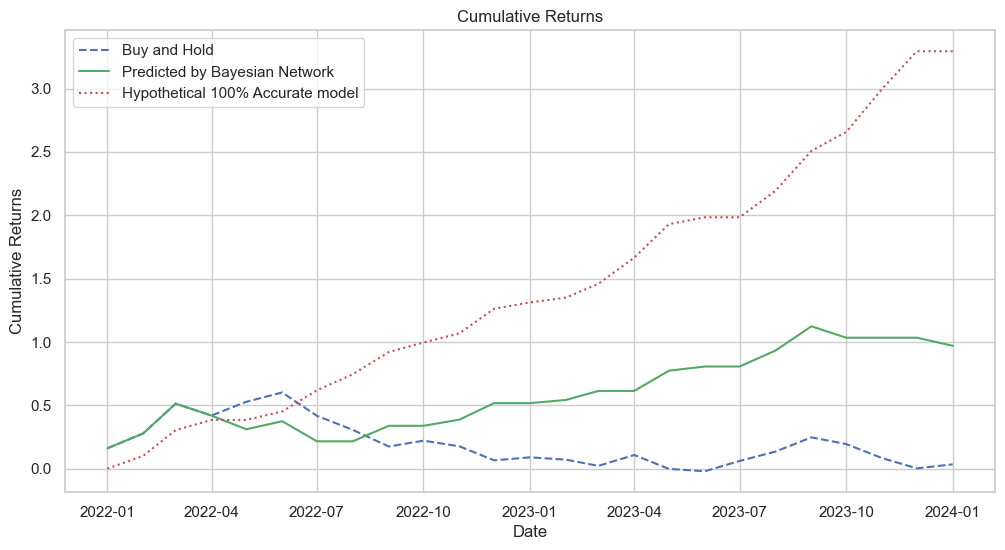

In [17]:
strat_df = pd.DataFrame()

strat_df['returns'] = test['WTI'].pct_change().dropna()[1:]

actual_signals = np.where(discrete_test['target'].values == 0, -1, 
                          np.where(discrete_test['target'].values == 1, 0, 1))

predicted_signals = np.where(predictions_test == 0, -1, 
                              np.where(predictions_test == 1, 0, 1))

strat_df['actual'] = actual_signals
strat_df['predictions'] = predicted_signals

bnh_returns = (1 + strat_df['returns']).cumprod() - 1
actual_regime_returns = (1 + strat_df['returns'] * strat_df['actual']).cumprod() - 1
predicted_regime_returns = (1 + strat_df['returns'] * strat_df['predictions']).cumprod() - 1

print('Buy and hold returns: {:.2f}%'.format(bnh_returns[-1] * 100))
print('BBN Model returns: {:.2f}%'.format(predicted_regime_returns[-1] * 100))
print('Hypothetical 100% accurate model returns: {:.2f}%'.format(actual_regime_returns[-1] * 100))

plt.figure(figsize=(12, 6))

plt.plot(bnh_returns, 'b--', label='Buy and Hold')
plt.plot(predicted_regime_returns, 'g-', label='Predicted by Bayesian Network')
plt.plot(actual_regime_returns, 'r:', label='Hypothetical 100% Accurate model')

plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')

plt.legend(loc='upper left')


plt.show()

The above plot shows the comparision of cumulative returns of a simple buy and hold strategy with the strategy of buy/hold/sell using the predictions from the Bayesian Network. Note that, the plot assumes no transaction costs. Along with the two, the cumulative returns of a 100% accurate hypothetical model is also plotted.

# Proposed results by Alvi. Danish

The 8 proposed results from the Danish paper are as follows: [Pg: 71-72] <cite data-cite='alvi_2018'></cite>
- Contribution to original research by replacing EGARCH-M views with Bayesian Model views for the Black-Litterman model. 
- Novel idea of using Hidden Markov Models for time-series data discretization in Belief Networks. 
- Presentation of a deployable trading mechanism capable of independent decision-making. 
- Testing the Bayesian Model outcome through historical backtesting on oil price data. 
- Utilization of Federal Reserve Economic Data and Energy Information Administration data sources. 
- Analysis of oil market structure through graphical models without expert assistance. 
- Risk analysis in energy markets using current economic situations for forecasting. 
- Development of an automated trading mechanism for commodities with learning capabilities.

## Novel idea of using Hidden Markov Models for time-series data discretization in Belief Networks.  

- Page 42: Chapter 3, section 3.3.1 discusses the regime detection using Hidden Markov Models. <cite data-cite='alvi_2018'></cite>
- Page 46: Chapter 3, section 3.5 discusses the assessment of the model, including the use of Bayesian networks and the leave-k-out cross-validation method. <cite data-cite='alvi_2018'></cite>
- Page 53 to 58: Chapter 4, section 4.3 discusses the implementation of the regime detection model using Hidden Markov Models, and validation of the constructed model by simulating trades and taking positions based on those trades. <cite data-cite='alvi_2018'></cite>
- The results of using HMMs for time-series data discretization in Belief Networks are further supported by the graphical illustration of the proposed 3-state HMM generating the behavior of a financial time-series, as shown in Figure 3.2 on page 43.
  
**Reflect:**
The research paper proposes the novel idea of using Hidden Markov Models (HMMs) for discretizing time-series data in Belief Networks. This approach states Computational Finance and Machine Learning methodologies are highly applicable in real-world settings. The results demonstrate the analysis of the structure of oil markets, risk assessment in energy markets, and the provision of an automated trading mechanism capable of learning and improving its trading decisions over time, ultimately resulting in higher alpha for a commodity trader.

**Why is it important?**
The author implemented Hidden Markov Models for time-series data discretization in Belief Networks, accomplishing this proposed result. This is significant as it introduces a new approach to analyzing and understanding complex data patterns, improving predictive capabilities in financial markets.


## Presentation of a deployable trading mechanism capable of independent decision-making.
- Page 48: Chapter 4, Implementation, presents a working trading mechanism that is directly deployable in commodity markets and capable of independent decision-making.
- A graphical representation of the trading mechanism's performance and decision-making capabilities, are shown on page 65, which supports the discussion of this presentation.

**Reflect:**
The first challenge that is investigated is the process of learning the structure of the oil markets. The dissertation presents a working trading mechanism that is directly deployable in commodity markets and capable of independent decision-making. This mechanism is almost an autonomous decision-making system that requires no prior expert knowledge, except for dataset selection by commodity market analysts. The implemented model is tested by simulating trades and taking positions based on those trades. The results and performance of the trading mechanism are depicted in the form of performance graphs given Chapter 4 Implementation section.

**Why is it important?**
The author fulfilled the objective by presenting a deployable trading mechanism capable of independent decision-making. This helps to reduce human error, optimizes the trading processes, and increases trading efficiency and profitability.

## Utilization of Federal Reserve Economic Data and Energy Information Administration data sources. 

- Page 35: Chapter 2, Background & Literature Review section provides an overview of the EIA and FRED data sources, including the macroeconomic datasets and expert knowledge about the relationships between different sectors of the economy. The study explore the correlation between oil prices and inflation expectations using FRED data. <cite data-cite='alvi_2018'></cite>
- Page 35: Crude Oil Trading model uses EIA data sources for time-series data on crude oil markets, expert economic knowledge, and forecasts of macroeconomic variables. <cite data-cite='alvi_2018'></cite>
- Page 38: EIA datasets are listed as table of contents shows the specific data sources used for the analysis. <cite data-cite='alvi_2018'></cite>
- Page 19: Chapter 3, Design section provides the process of discretizing the EIA and FRED data, emphasising the use of these data sources for the proposed models. <cite data-cite='alvi_2018'></cite>
- Page 49: Practical demonstration code snippets for retrieving and cleaning data of the EIA data sources for the analysis. <cite data-cite='alvi_2018'></cite>
Graphs and results are presented in Table 3.2, lists the datasets obtained from FRED, and show a demonstration of preprocessing the data.

**Reflect:**
The Federal Reserve Economic Data and Energy Information Administration data sources were effectively used for the research by the author. This achievement is significant because it made it possible to construct a Bayesian network for oil price predictions by integrating macroeconomic variables and data from the energy market.
The underlying research involved in both these data sources help bridge the knowledge between macroeconomic variables and oil prices. These data sources skillfully integrate numerous data sources, which helped to improve better decision-making in the energy markets.

**Why is it important?**
Federal Reserve Economic Data and Energy Information Administration data sources are used by the author to meet the proposed result. This enhances the quality and accuracy of the model by incorporating data from relevant and reliable data sources to build the trading mechanism.

## Development of an automated trading mechanism for commodities with learning capabilities.

- Page 58 to 64, Chapter 4. section: 4.2.6 and 4.3.1. involves building the trading mechanism by training the Bayesian Network using Hill Climbing approach <cite data-cite='alvi_2018'></cite>
- Page 60 and 65, Graph and results depict the outcomes of the model. Model’s representation of a directed graph, allows to make inferences using forecasts as evidence. <cite data-cite='alvi_2018'></cite>
  
**Reflect:**
As part of this suggested outcome, the author develops an automated trading system for commodities that has learning capabilities. By simulating trades and taking positions based on those trades, the built model is put to the test. The automated trading mechanism's performance and outcomes are displayed in the performance graphs found in the document's implementation section.

**Why is it important?**
As suggested by the research, the author successfully developed an automated trading system for commodities with learning capabilities. It presents an advanced system capable of making trading decisions on its own using past data and patterns that it has learned. The research advances quantitative trading tactics by continuously learning and adapting, which leads to better trading performance and risk management in commodities markets.

## Risk analysis in energy markets using current economic situations for forecasting. 

- Page 3 chapter 1, outlines risk analysis in energy markets using current economic situations for forecasting. <cite data-cite='alvi_2018'></cite>
- The risk analysis and forecasting results are likely presented in performance graphs in the implementation section evaluating the model's performance under various stress events. <cite data-cite='alvi_2018'></cite>
  
**Reflect:**
The author achieved the proposed outcome by conducting risk analysis in energy markets using current economic situations for forecasting. This is crucial in understanding the impact in energy markets on how economic conditions affect them. This provides good risk management  and allows better informed decision-making and forecasting. 
The current economic data that is used in research as part of analysis enhances the accuracy and reliability of forecasting models, providing valuable insights for energy market participants and regulators.

**Why is it important?**
For identifying and minimizing risks in the automated trading mechanism foe learning their capabilities. Also increasing market stability and resilience while undergoing risky economic situation.

# Discussion

The study presented an implementation of trading strategy for commodity markets in monthly frequency. The use of data from Energy Information Administration (EIA) has provided foundation for integrating macroeconomic variables and energy market data and helped understanding the inter-dependencies between the variables. The use of Hidden Markov Models (HMM) for time-series discretization allowed a more accurate representation of market regimes and transitions. HMM uses Expectation-Maximization (Baum-Welch) to learn the transition, initial and emission probabilities from the data. Then, it uses Viterbi algorithm to determine the most likely sequence given the learnt parameters. 

The predictive ability of the model comes from the Bayesian Belief Network (BBN). BBN learning is a two step process <cite data-cite='pgmpy'></cite>, one is the structure learning that learns the graph structure of the discretized time-series using Hill Climb Search algorithm <cite data-cite='hillclimb'></cite>. Second is the parameter learning, where the model learns the parameters, which are the probability tables, which consist of the marginal probabilities of each node and the conditional probability of the node given each parent node. The scoring function for the Hill Climb Search was chosen from BICScore, BDeuScore and K2Score by Grid Search with Anchored time-series validation approach. The parameter learning was selected from Maximum Likelihood Estimator and Bayesian Estimator using the Grid Search. 

The accuracy of the model is compared with a naive baseline model that just predicts the majority class for all observations. Accuracy is a generic metric which is a ratio of number of correct predictions to total number of predictions. The trained model have shown an accuracy of 55% on the training data and 52% on the test data, compared to the baseline model, which had 40% and 32% respectively. 

Finally, a trading strategy was implemented using the model predictions and was compared with the buy and hold strategy. The period of testing was between 2022 and 2024, where there were significant downward movements in the market. The strategy have shown a significant performance (97% cumulative returns) compared to buy and hold (3.40% cumulative returns). This is due to the fact, that the model was able to predict the market downturns with high recall of 62%. Also, a hypothetical model with 100% accuracy was used to judge the performance of HMM, which produced 329.43% cumulative returns. This indicates the potential for improvement in the predictor (BBN). 

Future work would involve collecting data from various sources such as social medias, news and analyze the sentiments and build a meta-model that combines the individual models to improve the predictive power.